In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('workout_fitness_tracker_data.csv')
df.head()

Saving workout_fitness_tracker_data.csv to workout_fitness_tracker_data.csv


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [ ]:
df.isnull().sum()

,0
User ID,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0


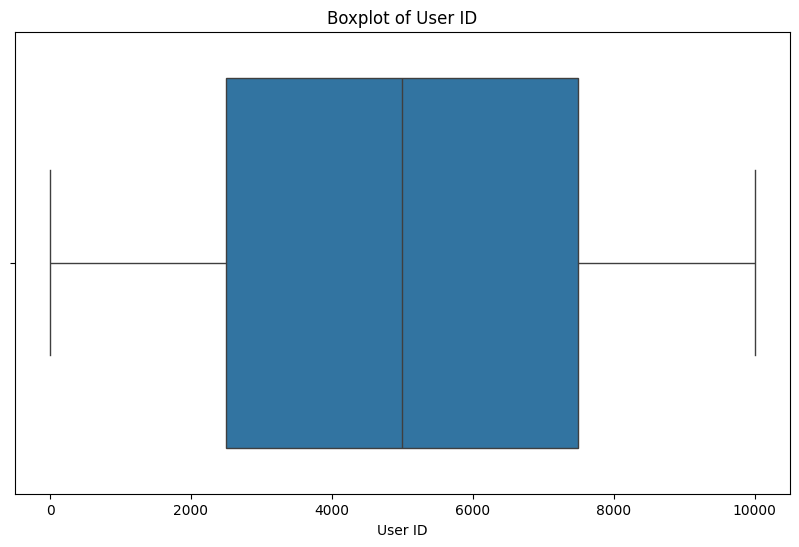

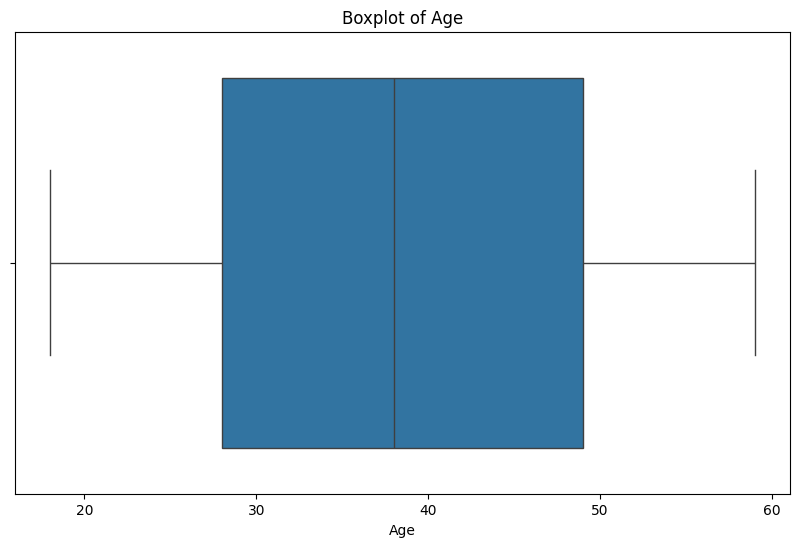

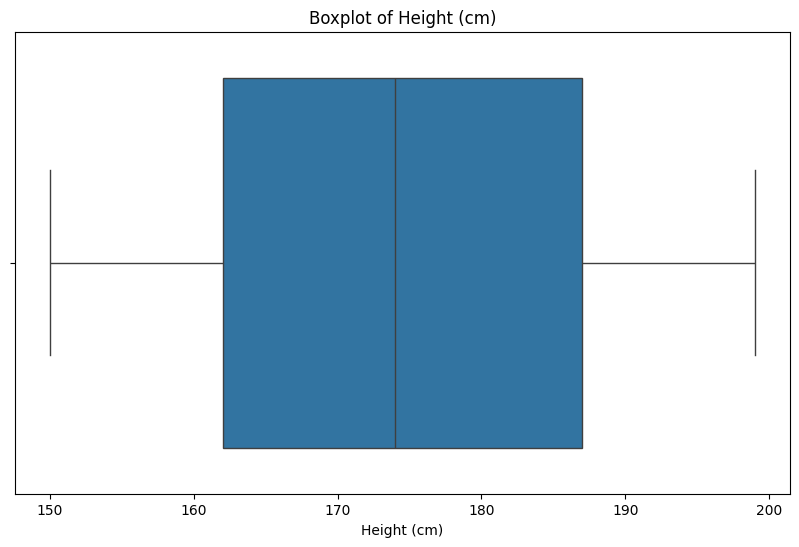

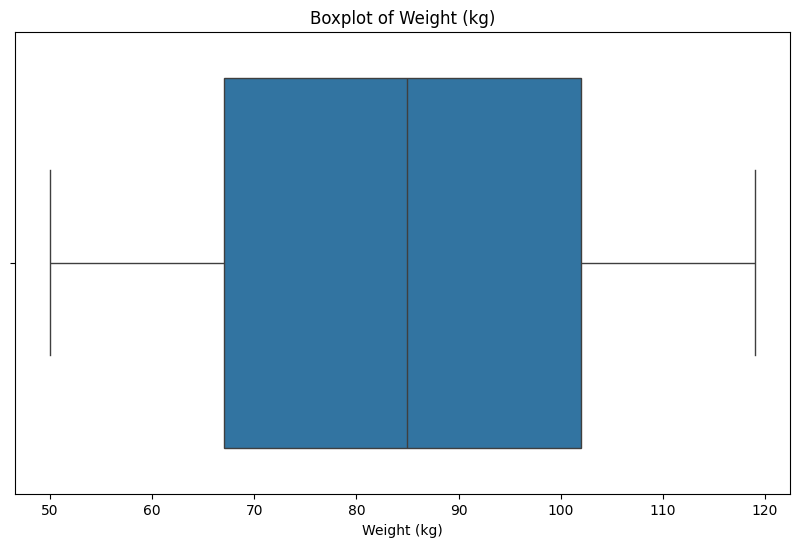

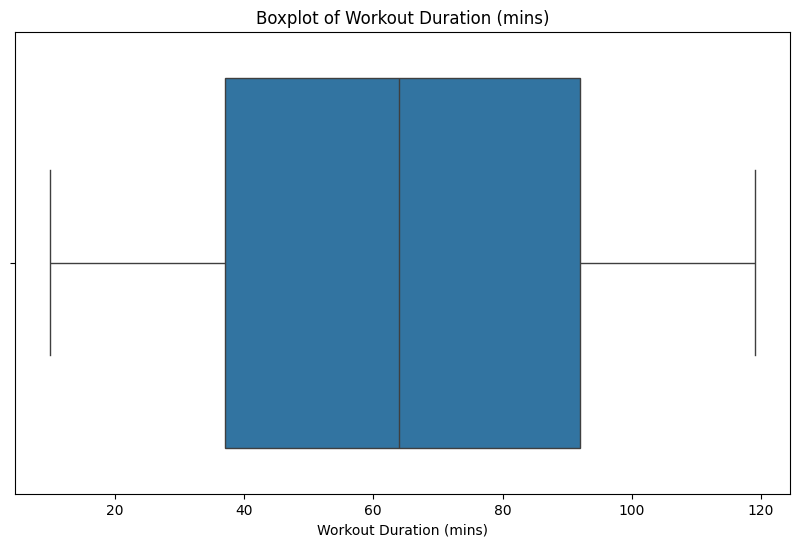

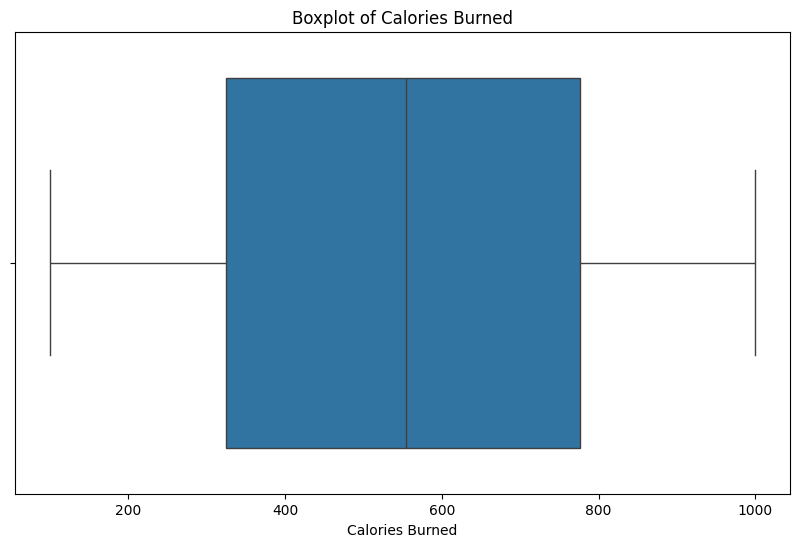

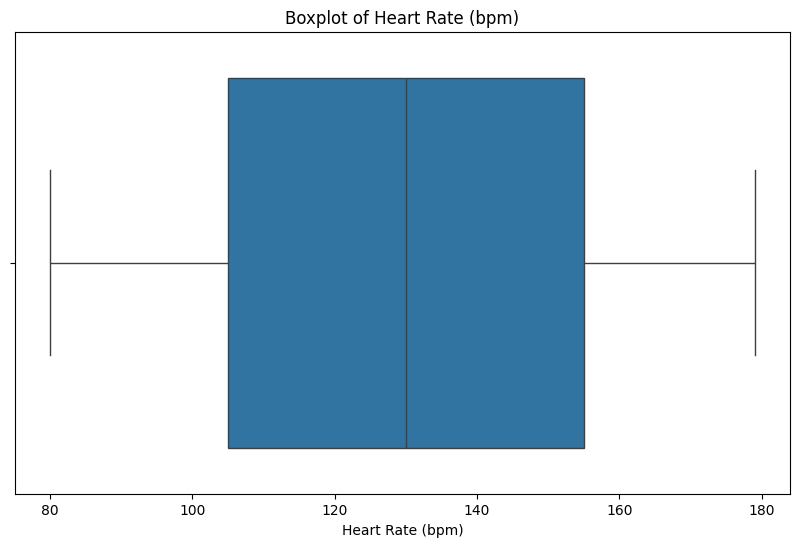

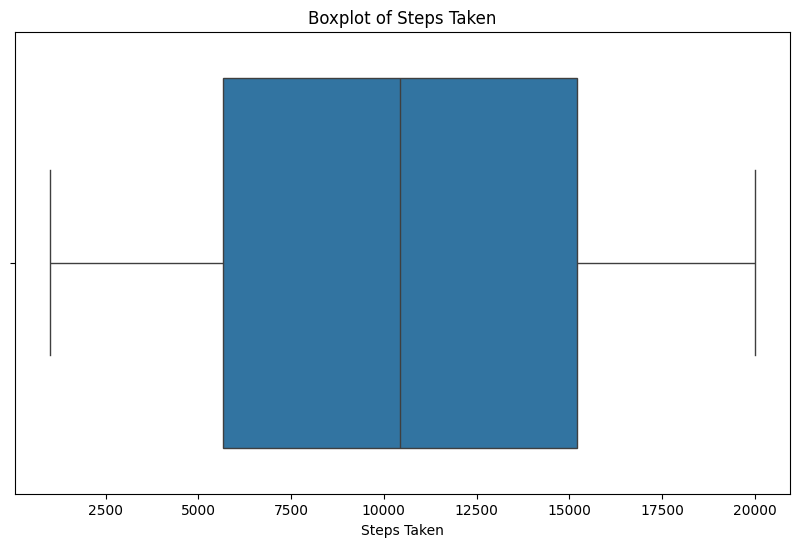

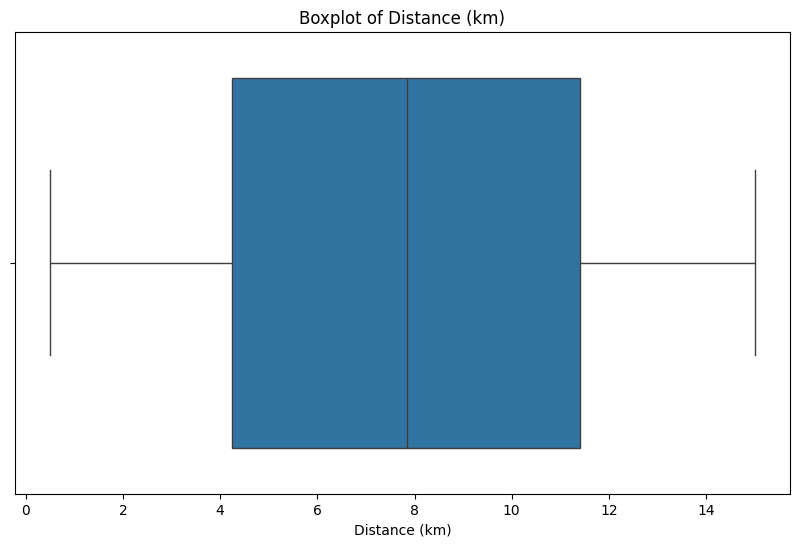

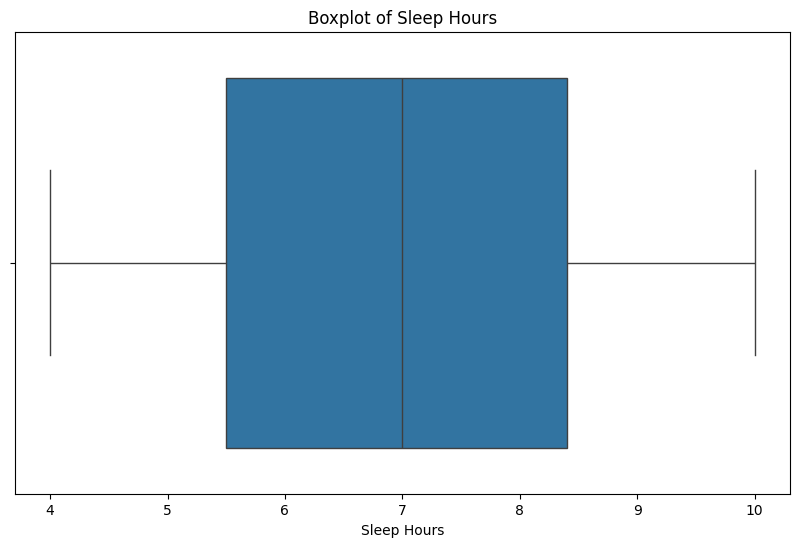

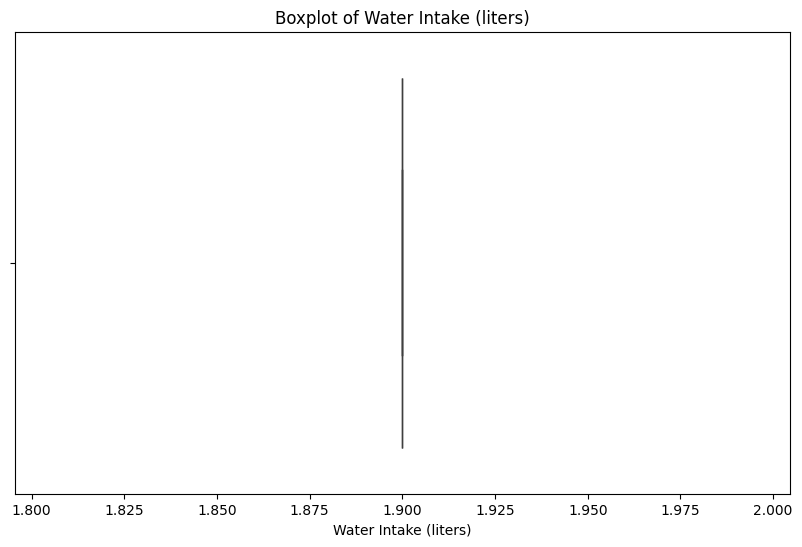

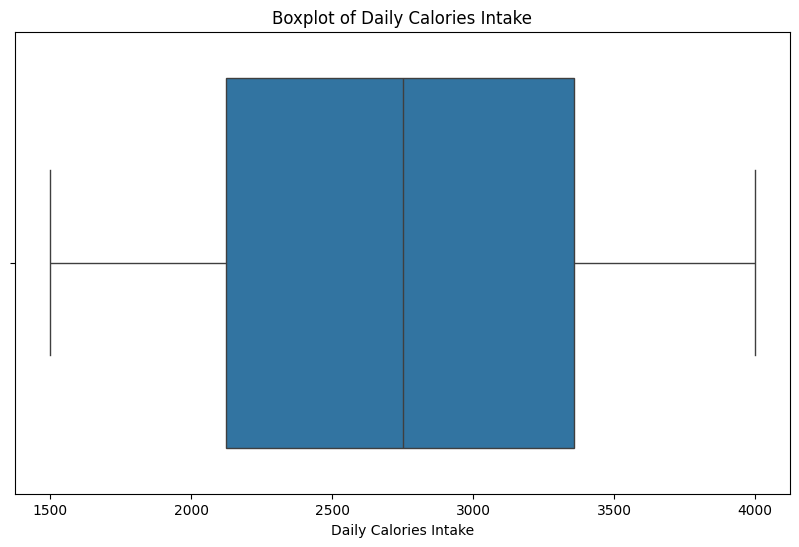

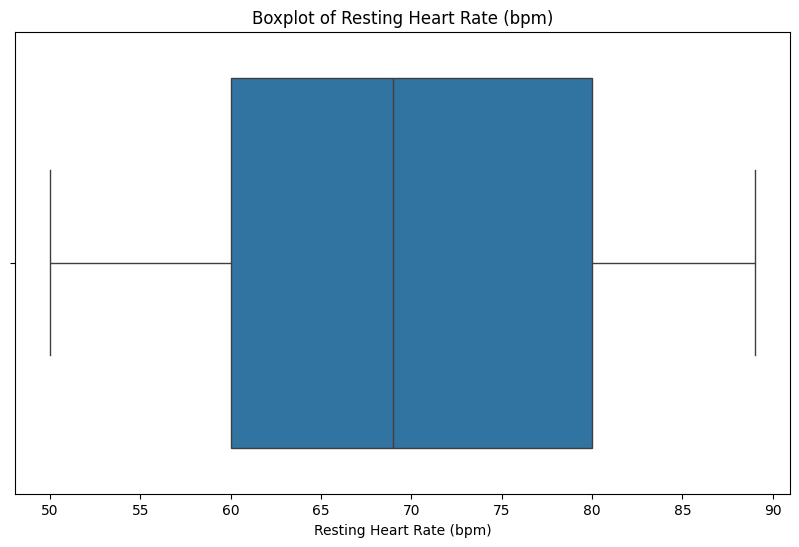

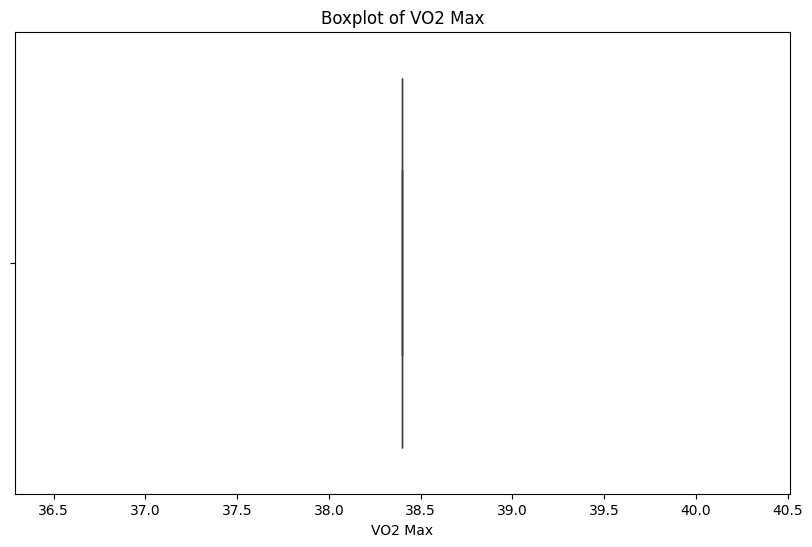

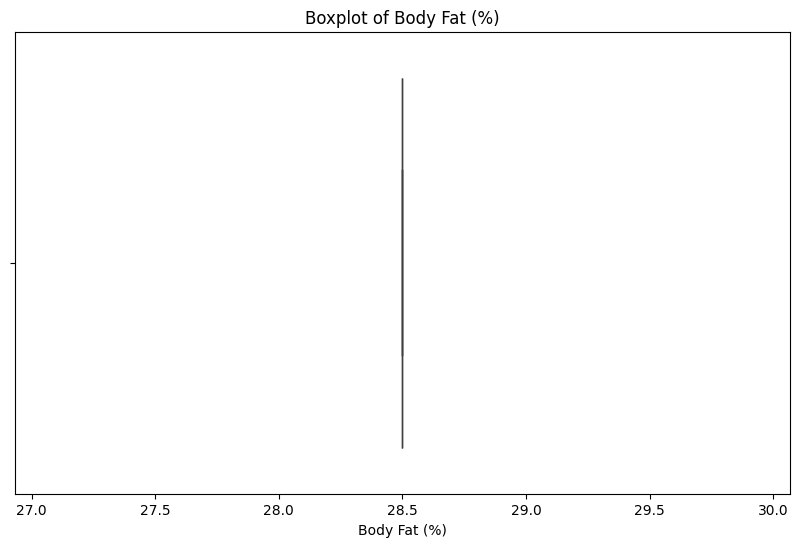

In [ ]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
features = ['Workout Duration (mins)','Workout Intensity' , 'Steps Taken','Calories Burned','Mood Before Workout']

X = df[features]

categorical_columns = ['Workout Intensity' , 'Mood Before Workout']
numerical_columns = ['Workout Duration (mins)','Steps Taken','Calories Burned']

preprocessor = ColumnTransformer([
    ('num',StandardScaler(),numerical_columns),
    ('cat',OneHotEncoder(),categorical_columns)
])

X_new = preprocessor.fit_transform(X)


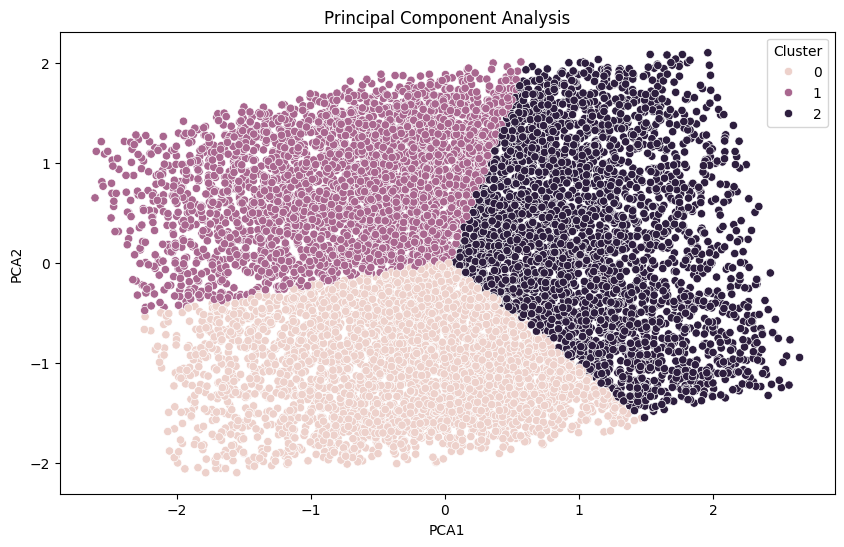

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)

df['PCA1']  = X_pca[:,0]
df['PCA2'] = X_pca[:,1]


plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1' , y='PCA2' , hue='Cluster' , data=df)
plt.title("Principal Component Analysis")
plt.show()

k = 3
kmeans = KMeans(n_clusters = k , random_state= 42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters

In [ ]:
score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for k={k}: {score}')

Silhouette Score for k=3: 0.3582194231455913


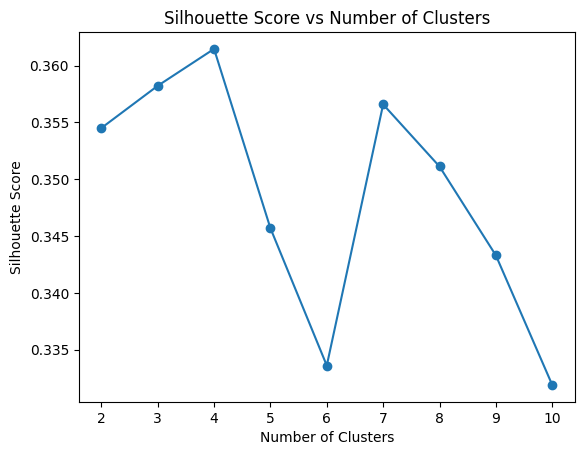

In [ ]:
sil_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k , random_state=42)
  clusters = kmeans.fit_predict(X_pca)
  score = silhouette_score(X_pca , clusters)
  sil_scores.append(score)
plt.plot(range(2,11),sil_scores,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [ ]:
print(df.groupby('Cluster')[numeric_features].mean().round(2))

for cat_col in categorical_features:
    print(df.groupby('Cluster')[cat_col].agg(lambda x: x.mode()[0]))

         Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  \
Cluster                                                               
0                          46.87           334.55            129.68   
1                          45.54           781.63            129.64   
2                          82.03           770.33            129.27   
3                          83.42           318.21            129.51   

         Steps Taken  Distance (km)  Sleep Hours  Water Intake (liters)  \
Cluster                                                                   
0           14092.19           7.92         7.00                    1.9   
1           13412.06           7.83         7.00                    1.9   
2            6710.32           7.87         6.95                    1.9   
3            7612.78           7.66         6.99                    1.9   

         Daily Calories Intake  Resting Heart Rate (bpm)  VO2 Max  \
Cluster                                              